imported
imported


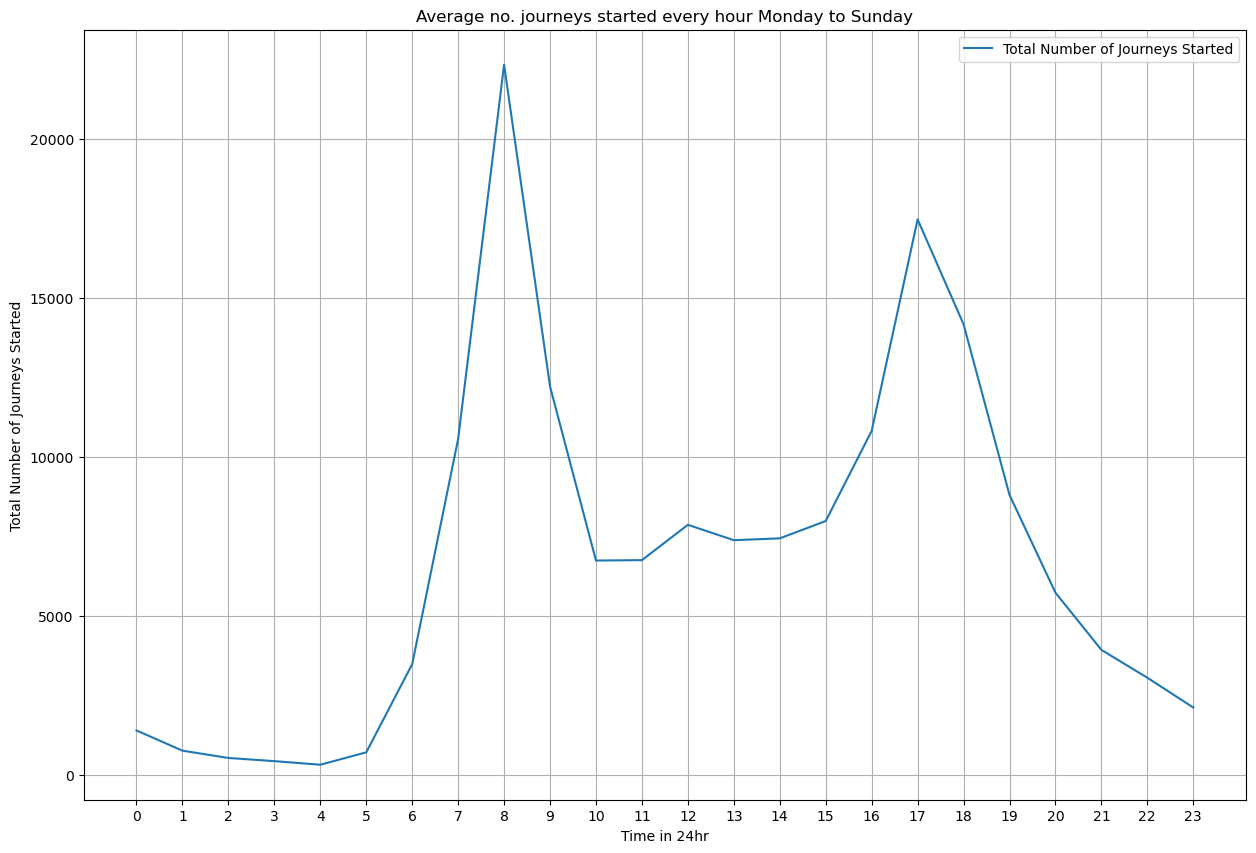

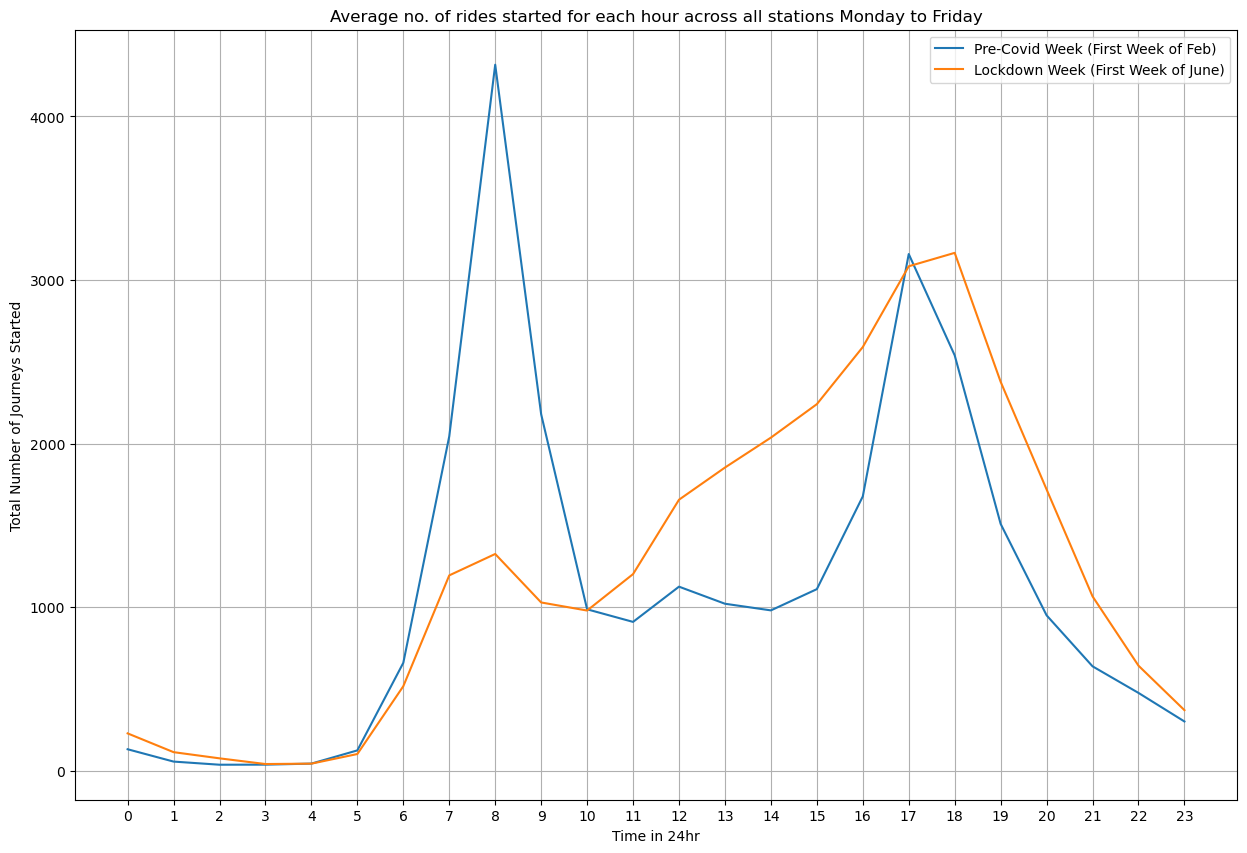

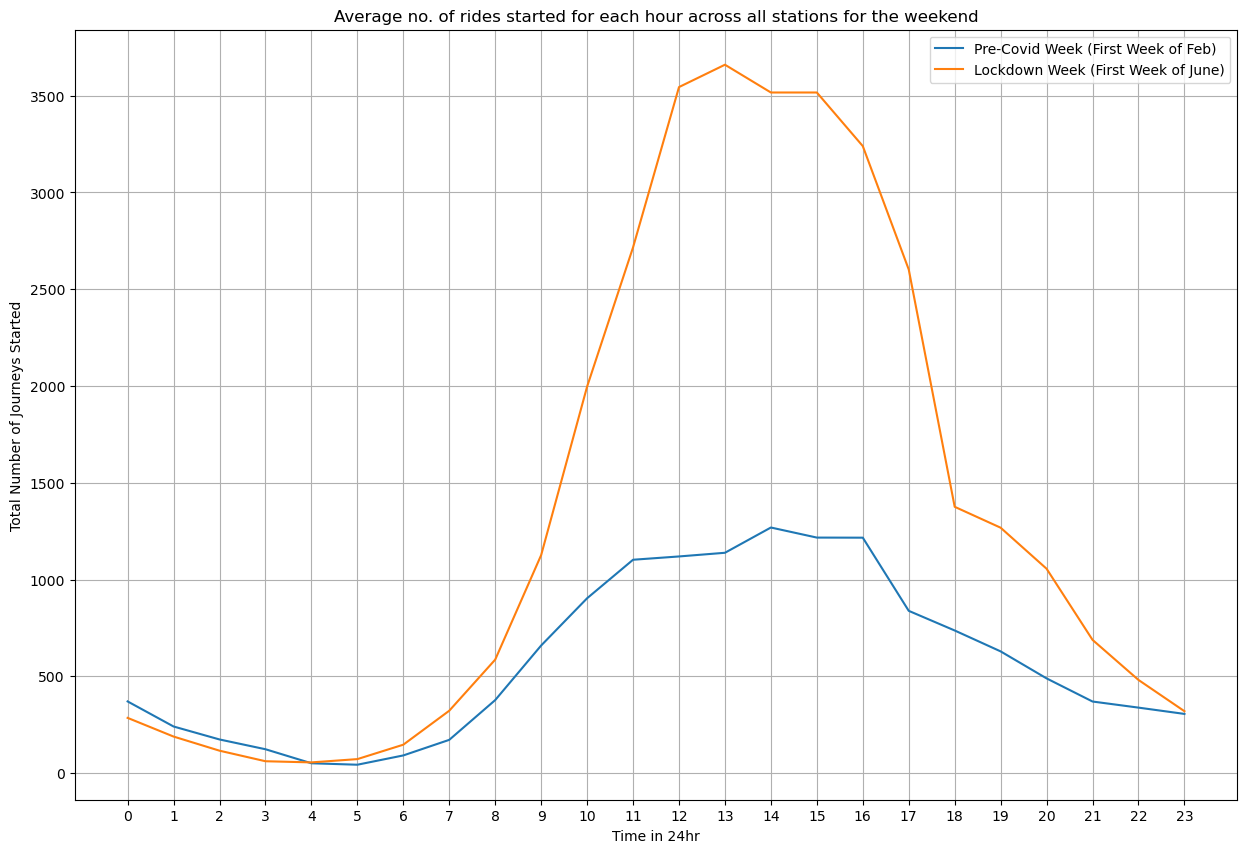

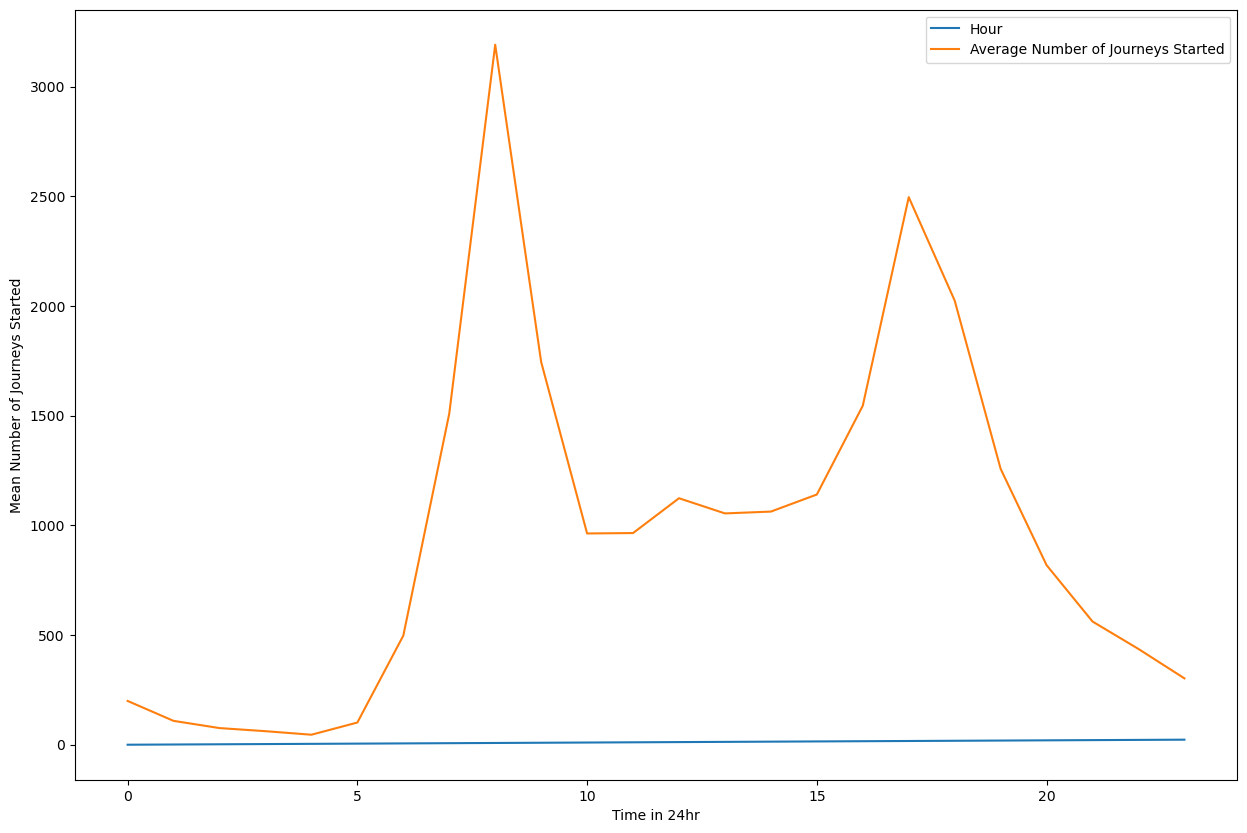

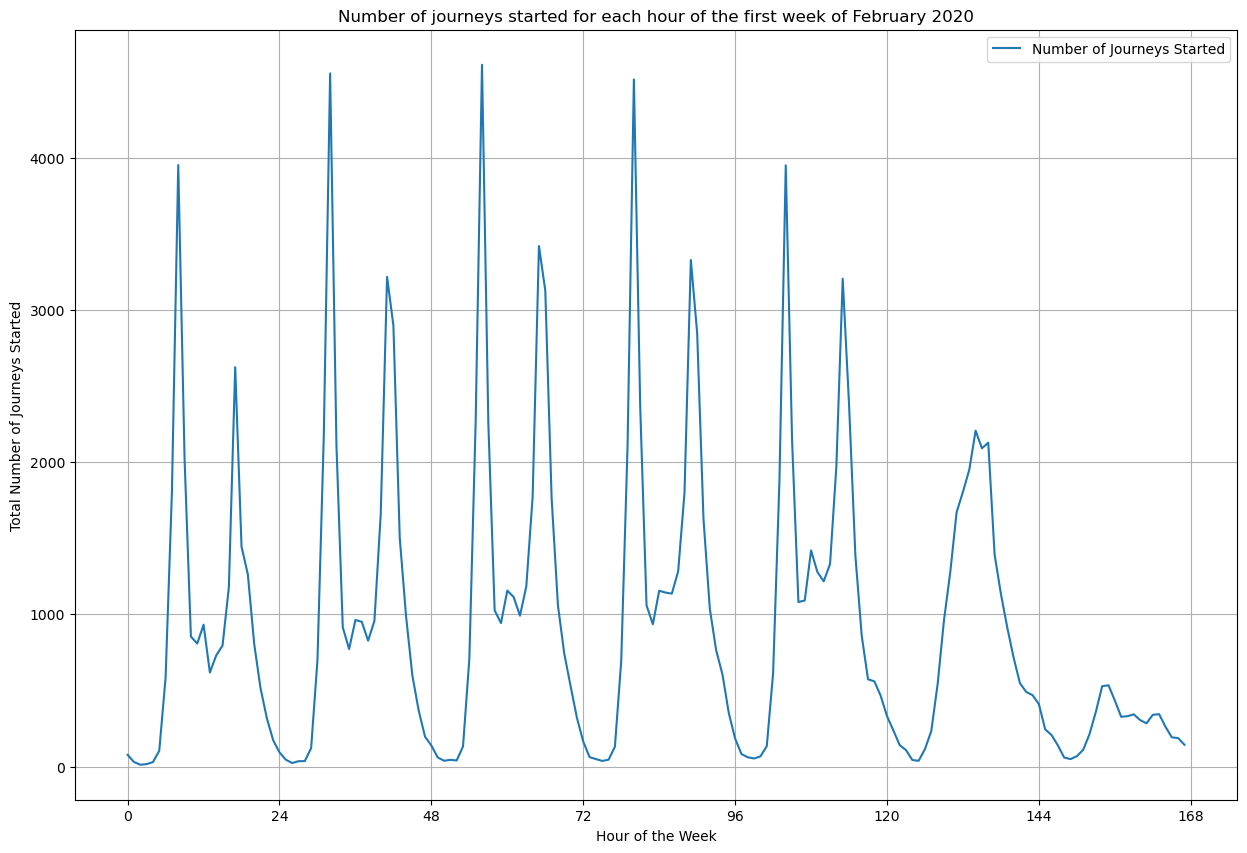

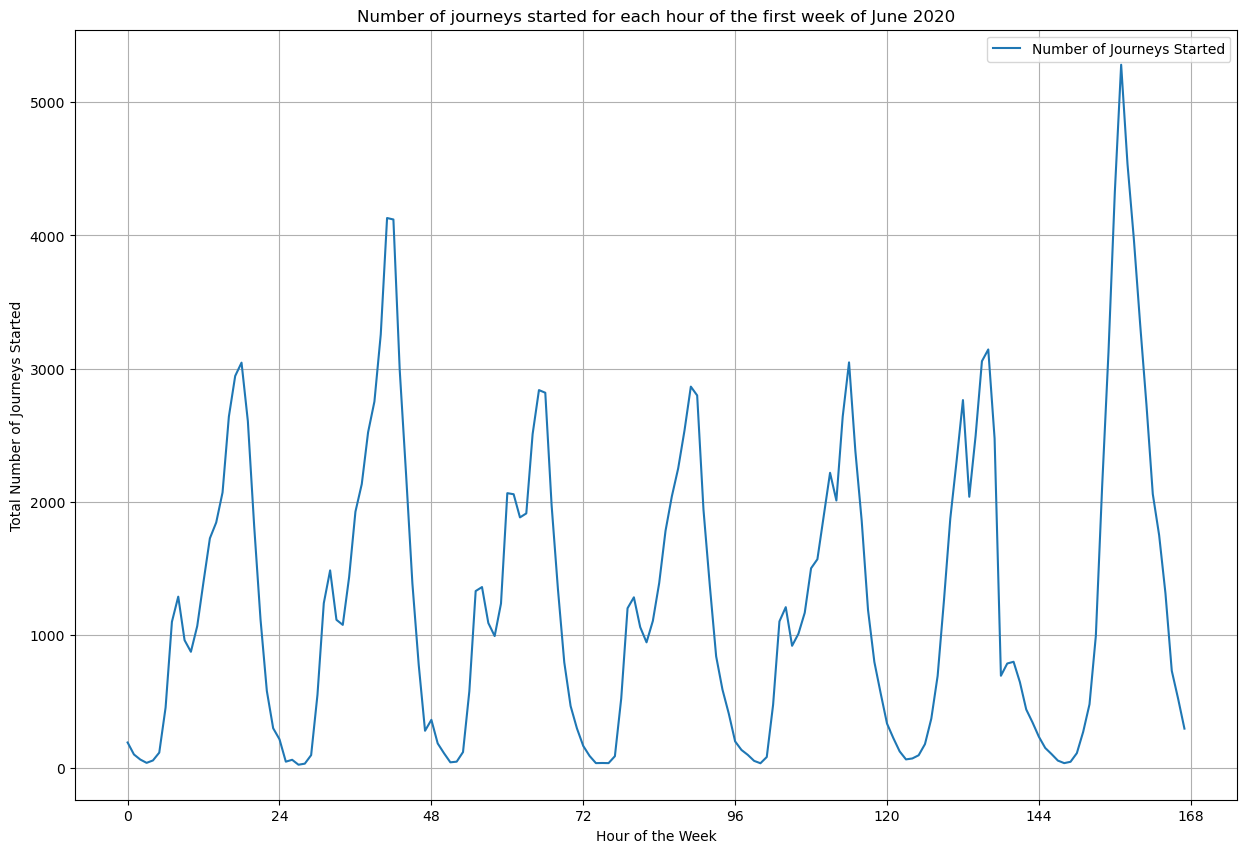

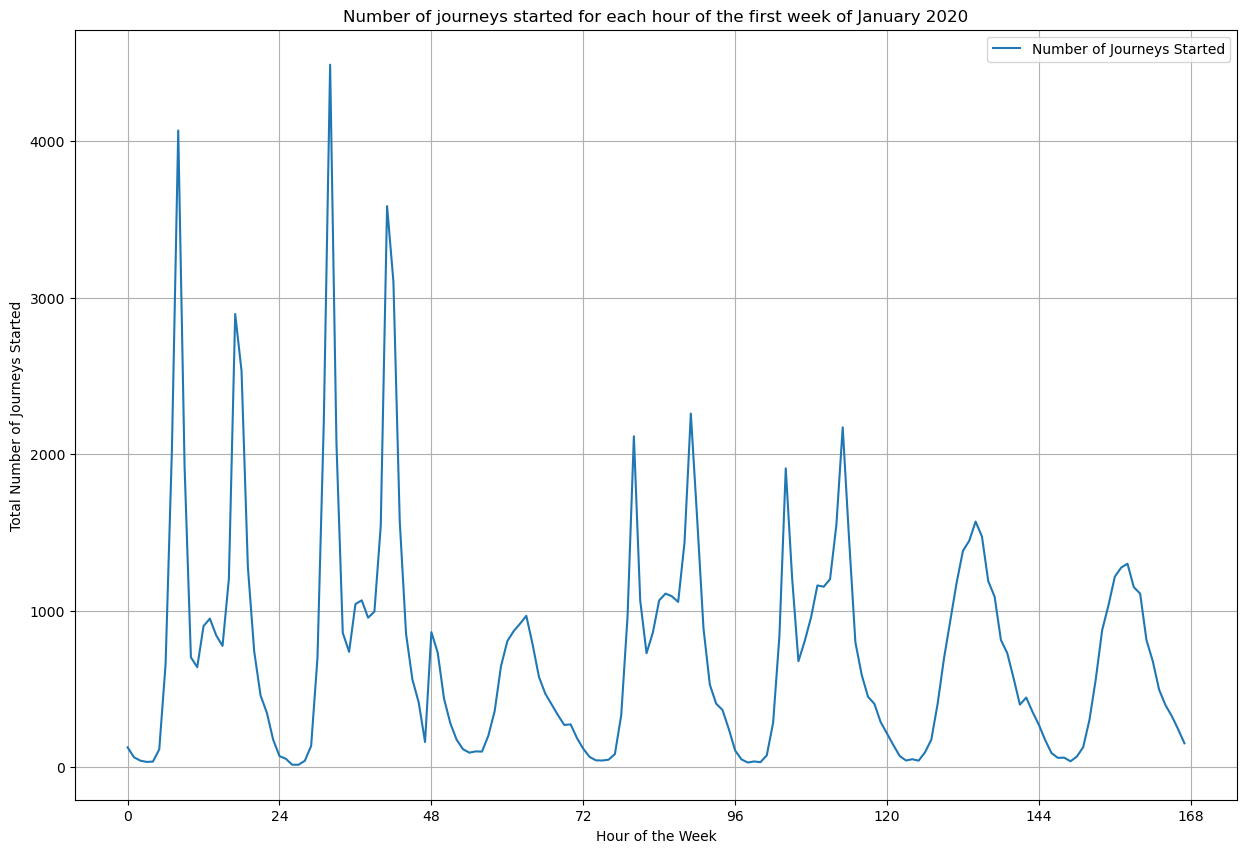

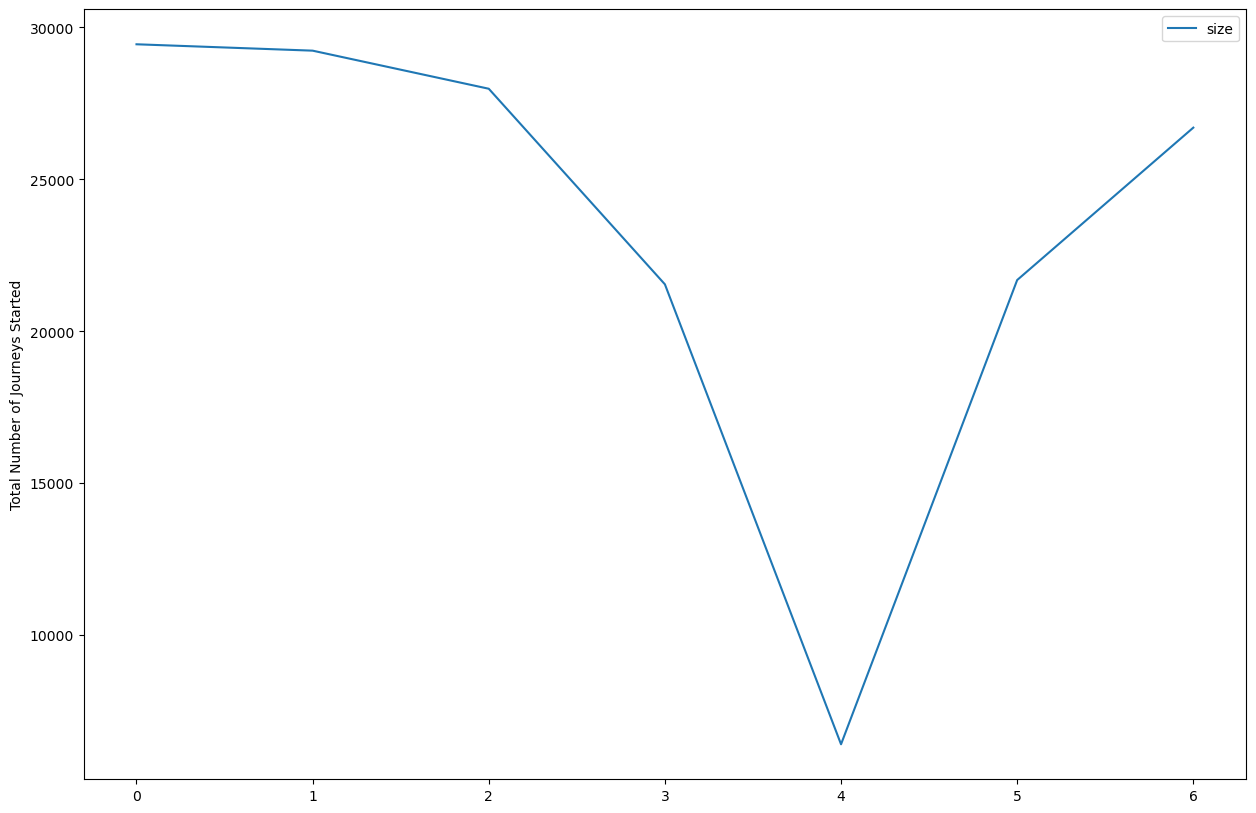

In [1]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame

import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point

from ipynb.fs.full.Process_Demand import getDFfromCSV, startTable, endAndStartedJourneys9AMDF, endAndStartedJourneys7PMDF, endAndStartedJourneys11PMDF, endAndStartedJourneys10AMDF
print("imported")

In [2]:
stationInfoDF = getDFfromCSV("Cycle hire docking stations.csv")
stationInfoDF

,StationId,StationName,longitude,latitude,Easting,Northing
0,1,"River Street, Clerkenwell",-0.109971,51.529200,531202.520,182832.020
1,2,"Phillimore Gardens, Kensington",-0.197574,51.499600,525207.070,179391.860
2,3,"Christopher Street, Liverpool Street",-0.084606,51.521300,532984.810,182001.530
3,4,"St. Chad's Street, King's Cross",-0.120974,51.530100,530436.760,182911.990
4,5,"Sedding Street, Sloane Square",-0.156876,51.493100,528051.649,178742.097
...,...,...,...,...,...,...
797,834,"Gas Holders, Battersea Park",-0.147857,51.477966,528720.000,177072.000
798,836,"York Way, Kings Cross",-0.125442,51.541596,530095.000,184187.000
799,835,"Farringdon Street, Holborn",-0.104948,51.516785,531588.000,181465.000
800,838,"Fore Street Avenue, Guildhall",-0.091402,51.518093,532524.000,181634.000


In [3]:
stationCoords = stationInfoDF[["StationId","StationName","longitude","latitude"]]
stationCoords

,StationId,StationName,longitude,latitude
0,1,"River Street, Clerkenwell",-0.109971,51.529200
1,2,"Phillimore Gardens, Kensington",-0.197574,51.499600
2,3,"Christopher Street, Liverpool Street",-0.084606,51.521300
3,4,"St. Chad's Street, King's Cross",-0.120974,51.530100
4,5,"Sedding Street, Sloane Square",-0.156876,51.493100
...,...,...,...,...
797,834,"Gas Holders, Battersea Park",-0.147857,51.477966
798,836,"York Way, Kings Cross",-0.125442,51.541596
799,835,"Farringdon Street, Holborn",-0.104948,51.516785
800,838,"Fore Street Avenue, Guildhall",-0.091402,51.518093


# Average Change in Inventory per station for the whole week

In [4]:
# Average change in the num of bikes per station for the week
# Need to group by station ID because the different data sets have different punctuation for station names

changeNumBikesDF = startTable.groupby(["StartStation Id","StartStation Name"])["Change in number of bikes"].mean().reset_index()
changeNumBikesDF= changeNumBikesDF.rename( {"StartStation Id" : "StationId", "StartStation Name":"StationName"}, axis=1)
changeNumBikesDF

,StationId,StationName,Change in number of bikes
0,1,"River Street , Clerkenwell",-6.428571
1,2,"Phillimore Gardens, Kensington",-5.571429
2,3,"Christopher Street, Liverpool Street",1.714286
3,4,"St. Chad's Street, King's Cross",9.714286
4,5,"Sedding Street, Sloane Square",-8.857143
...,...,...,...
776,834,"Gas Holders, Battersea Park",5.000000
777,835,"Farringdon Street, Holborn",4.285714
778,836,"York Way, Kings Cross",27.142857
779,838,"Fore Street Avenue, Guildhall",8.428571


In [5]:
#Remove the station location data that we dont need
#Has all the geographical coords for the stations in our data, no more or less
inventoryAndCoordsDF = pd.merge(changeNumBikesDF, stationCoords, on="StationId", how="left")
inventoryAndCoordsDF = inventoryAndCoordsDF.drop("StationName_y",axis=1).rename({"StationName_x":"StationName"}, axis=1)
inventoryAndCoordsDF

,StationId,StationName,Change in number of bikes,longitude,latitude
0,1,"River Street , Clerkenwell",-6.428571,-0.109971,51.529200
1,2,"Phillimore Gardens, Kensington",-5.571429,-0.197574,51.499600
2,3,"Christopher Street, Liverpool Street",1.714286,-0.084606,51.521300
3,4,"St. Chad's Street, King's Cross",9.714286,-0.120974,51.530100
4,5,"Sedding Street, Sloane Square",-8.857143,-0.156876,51.493100
...,...,...,...,...,...
776,834,"Gas Holders, Battersea Park",5.000000,-0.147857,51.477966
777,835,"Farringdon Street, Holborn",4.285714,-0.104948,51.516785
778,836,"York Way, Kings Cross",27.142857,-0.125442,51.541596
779,838,"Fore Street Avenue, Guildhall",8.428571,-0.091402,51.518093


In [6]:
nan_values = inventoryAndCoordsDF[inventoryAndCoordsDF["longitude"].isna()]
print(nan_values)

Empty DataFrame
Columns: [StationId, StationName, Change in number of bikes, longitude, latitude]
Index: []


# Change in Inventory by 9AM and 7PM

In [7]:
endAndStartedJourneys9AMDF

,StartStation Id,StartStation Name,Total Number of Journeys Started,Total Number of Journeys Ended,Change In Inventory by 9AM
0,108.0,"Abbey Orchard Street, Westminster",2.0,33.0,31.0
1,559.0,"Abbotsbury Road, Holland Park",3.0,0.0,-3.0
2,394.0,"Aberdeen Place, St. John's Wood",8.0,5.0,-3.0
3,554.0,"Aberfeldy Street, Poplar",3.0,0.0,-3.0
4,583.0,"Abingdon Green, Westminster",3.0,32.0,29.0
...,...,...,...,...,...
776,494.0,"South Quay East, Canary Wharf",0.0,1.0,1.0
777,162.0,"Southampton Place, Holborn",0.0,22.0,22.0
778,803.0,"Southwark Street, Bankside",0.0,22.0,22.0
779,519.0,"Teviot Street, Poplar",0.0,1.0,1.0


In [8]:

#Remove the station location data that we dont need
# Has all the geographical coords for the stations in our data, no more or less
def mergeCoordsAndInventoryDFs(endAndStartedJourneys9AMDF):
    
    inventoryAndCoords9AMDF = pd.merge(stationCoords, endAndStartedJourneys9AMDF,  how="left",
                                       left_on = 'StationId', right_on ='StartStation Id' )
    inventoryAndCoords9AMDF = inventoryAndCoords9AMDF.drop(["StartStation Id",
                                                            "StartStation Name",
                                                            "Total Number of Journeys Started",
                                                            "Total Number of Journeys Ended"], 
                                                           axis="columns")
    return inventoryAndCoords9AMDF

inventoryAndCoords9AMDF = mergeCoordsAndInventoryDFs(endAndStartedJourneys9AMDF)
inventoryAndCoords9AMDF

,StationId,StationName,longitude,latitude,Change In Inventory by 9AM
0,1,"River Street, Clerkenwell",-0.109971,51.529200,-14.0
1,2,"Phillimore Gardens, Kensington",-0.197574,51.499600,-1.0
2,3,"Christopher Street, Liverpool Street",-0.084606,51.521300,31.0
3,4,"St. Chad's Street, King's Cross",-0.120974,51.530100,-5.0
4,5,"Sedding Street, Sloane Square",-0.156876,51.493100,26.0
...,...,...,...,...,...
797,834,"Gas Holders, Battersea Park",-0.147857,51.477966,-3.0
798,836,"York Way, Kings Cross",-0.125442,51.541596,-12.0
799,835,"Farringdon Street, Holborn",-0.104948,51.516785,24.0
800,838,"Fore Street Avenue, Guildhall",-0.091402,51.518093,21.0


In [9]:
inventoryAndCoords7PMDF = mergeCoordsAndInventoryDFs(endAndStartedJourneys7PMDF)
inventoryAndCoords7PMDF

,StationId,StationName,longitude,latitude,Change In Inventory by 7PM
0,1,"River Street, Clerkenwell",-0.109971,51.529200,-7.0
1,2,"Phillimore Gardens, Kensington",-0.197574,51.499600,-8.0
2,3,"Christopher Street, Liverpool Street",-0.084606,51.521300,12.0
3,4,"St. Chad's Street, King's Cross",-0.120974,51.530100,1.0
4,5,"Sedding Street, Sloane Square",-0.156876,51.493100,-1.0
...,...,...,...,...,...
797,834,"Gas Holders, Battersea Park",-0.147857,51.477966,3.0
798,836,"York Way, Kings Cross",-0.125442,51.541596,-6.0
799,835,"Farringdon Street, Holborn",-0.104948,51.516785,0.0
800,838,"Fore Street Avenue, Guildhall",-0.091402,51.518093,0.0


In [10]:
inventoryAndCoords11PMDF = mergeCoordsAndInventoryDFs(endAndStartedJourneys11PMDF)

In [11]:
inventoryAndCoords10AMDF = mergeCoordsAndInventoryDFs(endAndStartedJourneys10AMDF)

# Plot the scatter maps

In [12]:
stationCoordsDF = stationInfoDF[["StationId", "StationName", "longitude", "latitude"]]
stationInfoDF["latitude"] = pd.to_numeric(stationInfoDF["latitude"])
stationInfoDF["longitude"] = pd.to_numeric(stationInfoDF["longitude"])
stationCoordsDF

,StationId,StationName,longitude,latitude
0,1,"River Street, Clerkenwell",-0.109971,51.529200
1,2,"Phillimore Gardens, Kensington",-0.197574,51.499600
2,3,"Christopher Street, Liverpool Street",-0.084606,51.521300
3,4,"St. Chad's Street, King's Cross",-0.120974,51.530100
4,5,"Sedding Street, Sloane Square",-0.156876,51.493100
...,...,...,...,...
797,834,"Gas Holders, Battersea Park",-0.147857,51.477966
798,836,"York Way, Kings Cross",-0.125442,51.541596
799,835,"Farringdon Street, Holborn",-0.104948,51.516785
800,838,"Fore Street Avenue, Guildhall",-0.091402,51.518093


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

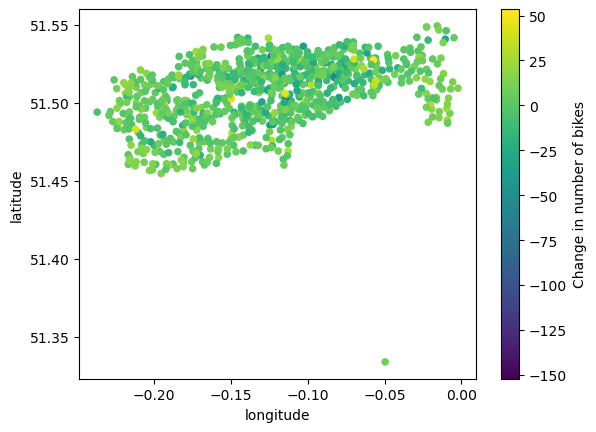

In [13]:
inventoryAndCoordsDF.plot.scatter(x = "longitude", 
                                  y="latitude",
                                  c="Change in number of bikes",
                                  colormap='viridis')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

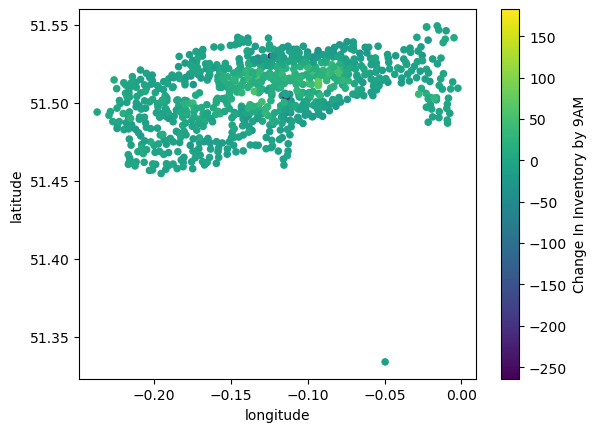

In [14]:
inventoryAndCoords9AMDF.plot.scatter(x = "longitude", 
                                  y="latitude",
                                  c="Change In Inventory by 9AM",
                                  colormap='viridis')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

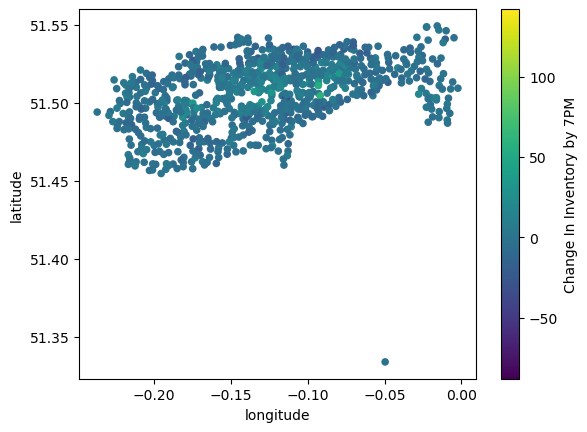

In [15]:
inventoryAndCoords7PMDF.plot.scatter(x = "longitude", 
                                  y="latitude",
                                  c="Change In Inventory by 7PM",
                                  colormap='viridis')

In [16]:
import folium

def displayMap(coordinateDF, inventoryColumnName):
    londonMap = folium.Map(location= 
                           [coordinateDF.latitude.mean(), 
                            coordinateDF.longitude.mean()],
                           tiles='Stamen Toner',
                          zoom_start = 15, control_scale=True)
    
    for index,row in coordinateDF.iterrows():
        if row[inventoryColumnName]>0:
            color= "red"
        elif row[inventoryColumnName]==0:
            color= "purple"
        else:
            color= "darkblue"
            
        #folium.Marker(location=[row.latitude, row.longitude],
        #              icon=folium.Icon(color=color), 
         #             popup=row.StationName).add_to(londonMap)
        
        folium.CircleMarker(location=[row.latitude, row.longitude],
                        radius=4,
                        color=color,
                        fill=True).add_to(londonMap)
    return londonMap 

displayMap(inventoryAndCoords9AMDF,"Change In Inventory by 9AM")

In [17]:
displayMap(inventoryAndCoords7PMDF,"Change In Inventory by 7PM")

In [18]:
displayMap(inventoryAndCoords11PMDF, "Change In Inventory by 11PM")

In [19]:
displayMap(inventoryAndCoords10AMDF, "Change In Inventory by 10AM")

In [20]:
gdf = gpd.GeoDataFrame(
    inventoryAndCoords9AMDF, 
    geometry=gpd.points_from_xy(inventoryAndCoords9AMDF.longitude, 
                                      inventoryAndCoords9AMDF.latitude))

In [21]:
print(gdf.head())

   StationId                           StationName  longitude  latitude  \
0          1             River Street, Clerkenwell  -0.109971   51.5292   
1          2        Phillimore Gardens, Kensington  -0.197574   51.4996   
2          3  Christopher Street, Liverpool Street  -0.084606   51.5213   
3          4       St. Chad's Street, King's Cross  -0.120974   51.5301   
4          5         Sedding Street, Sloane Square  -0.156876   51.4931   

   Change In Inventory by 9AM                   geometry  
0                       -14.0  POINT (-0.10997 51.52920)  
1                        -1.0  POINT (-0.19757 51.49960)  
2                        31.0  POINT (-0.08461 51.52130)  
3                        -5.0  POINT (-0.12097 51.53010)  
4                        26.0  POINT (-0.15688 51.49310)  


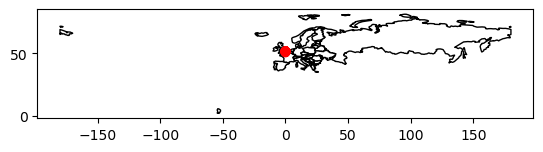

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'Europe'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [23]:
# set the filepath and load in a shapefile
fp = "London-wards-2018_ESRI/London_Ward.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16..."
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16..."
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16..."
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((520336.700 165105.498, 520332.198 16..."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16..."


<AxesSubplot:>

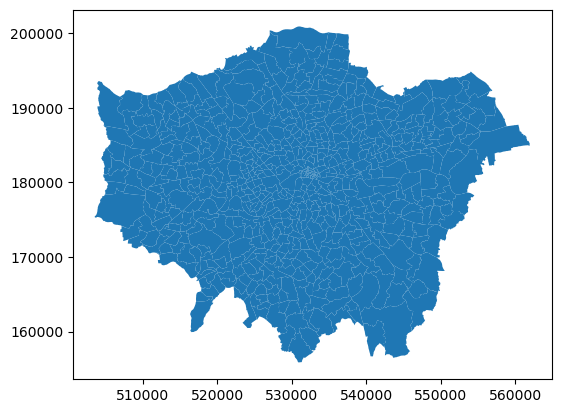

In [24]:
map_df.plot()

(500648.73475333815, 564876.9609795979, 153596.64224543422, 203188.0578653461)

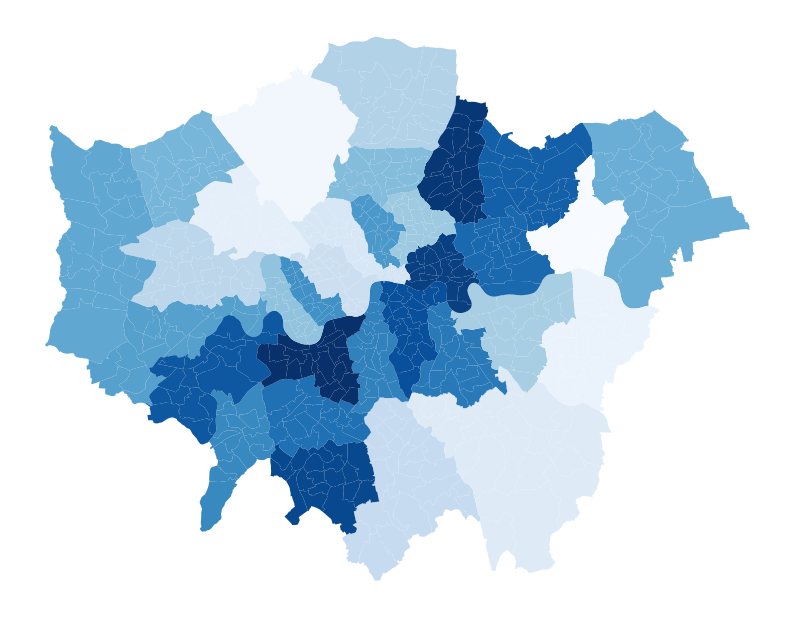

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
map_df.plot(ax=ax, column="DISTRICT", cmap="Blues")
ax.axis("off")